In [85]:
import ROOT
from boost_histogram import underflow, overflow
import pickle as pkl
from numpy import sqrt

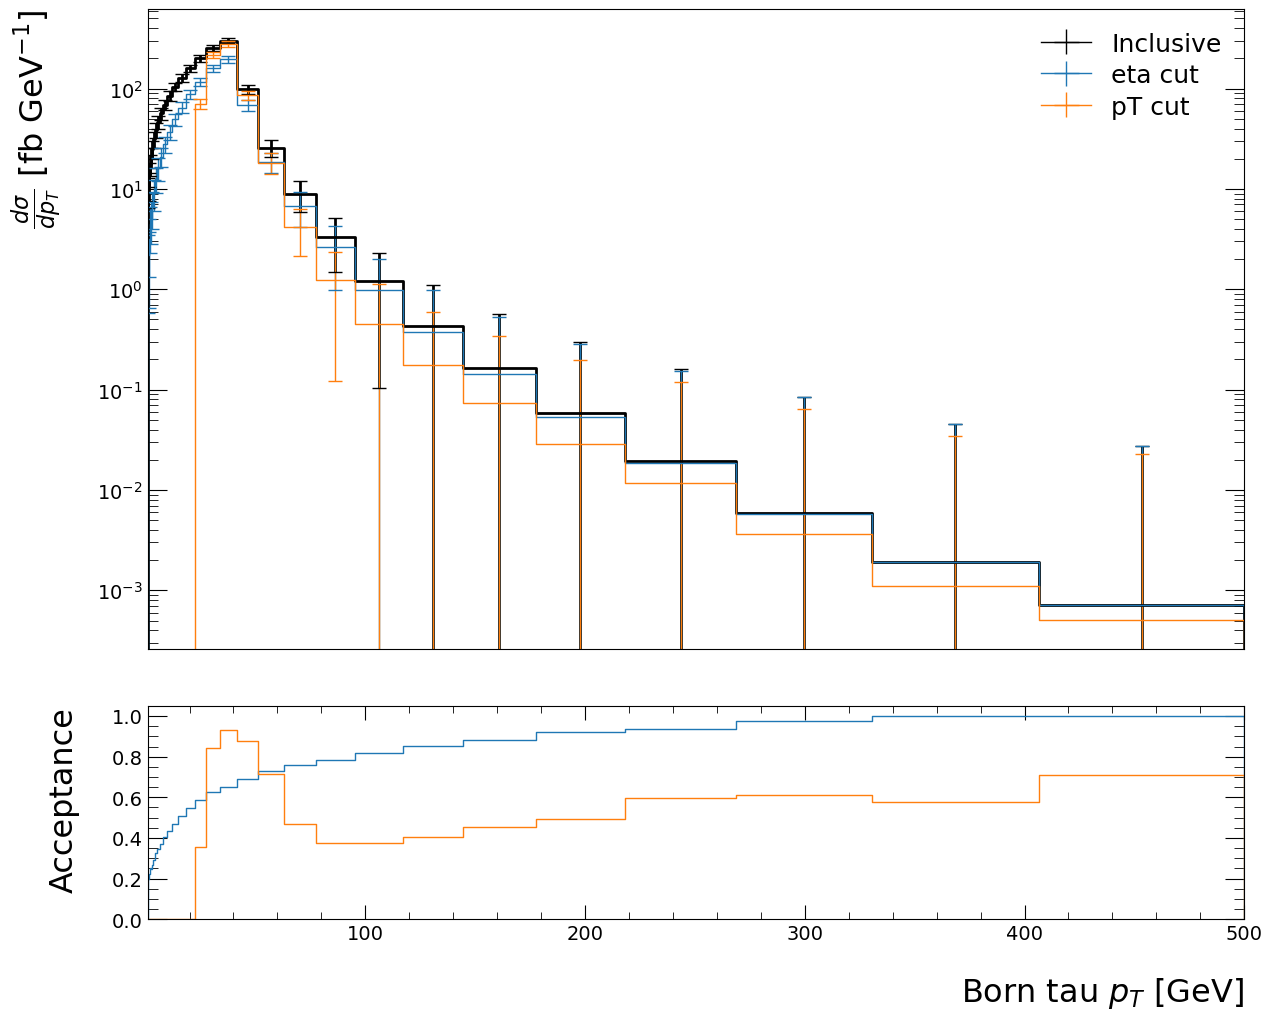

In [86]:
histfile = '../../outputs/cutfile/histograms/truth_inclusive_MC_WZmu_el_pt_born_1d_cutgroups_ratios.pkl'
with open(histfile, 'rb') as f:
	hists = pkl.load(f)

In [87]:
for k,v in hists.items():
	print(k, type(v))

inclusive <class 'boost_histogram.Histogram'>
eta cut <class 'boost_histogram.Histogram'>
eta cut_ratio <class 'list'>
pT cut <class 'boost_histogram.Histogram'>
pT cut_ratio <class 'list'>


In [88]:
h_inc = hists['inclusive']
h_inc

Histogram(Regular(30, 1, 500, transform=log), storage=Weight()) # Sum: WeightedSum(value=1712.69, variance=1747.04) (WeightedSum(value=3264.69, variance=3373.04) with flow)

In [89]:
h_inc_root = ROOT.TH1F('inclusive', 'inclusive', len(h_inc.axes[0]), h_inc.axes[0].edges)

Warning in <TROOT::Append>: Replacing existing TH1: inclusive (Potential memory leak).


In [90]:
h_inc_root.SetBinContent(0, h_inc[underflow].value)
h_inc_root.SetBinContent(-1, h_inc[overflow].value)
for i, bin_val in enumerate(h_inc.view()):
	h_inc_root.SetBinContent(i+1, bin_val.value)
	h_inc_root.SetBinError(i+1, sqrt(bin_val.variance))

In [91]:
c = ROOT.TCanvas()
c.SetLogy()
h_inc_root.Draw("histE")

In [92]:
c.Print('hist.png')

Info in <TCanvas::Print>: png file hist.png has been created


## 2D hist


In [93]:
histfile_2d = '../../outputs/cutfile/histograms/truth_inclusiveMC_WZ_dilep_m_born-MC_WZmu_el_eta_born_2d.pkl'
with open(histfile_2d, 'rb') as f:
	hist_2d = pkl.load(f)

In [94]:
hist = hist_2d['eta cut']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices